In [1]:
!rm -rf * .* 2>/dev/null
!rm -rf ~/.kaggle && mkdir ~/.kaggle
!echo eyJ1c2VybmFtZSI6InB2dHNlYzB4MSIsImtleSI6IjZlOTYxZmMxYjdhYzU2OTlmNzcwYmFjMjI1NTk4MWIwIn0= | base64 -d > ~/.kaggle/kaggle.json
!git clone https://github.com/Reshmavineesh/SunLit-Segmentation .
!git checkout dev
!./download_dataset.sh
from IPython.display import clear_output
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'; clear_output()
print("Dataset ready")

Dataset ready


In [2]:
import utils
import tensorflow as tf

image_path = 'dataset/dataset_tomato_128/color_images/'
mask_path = 'dataset/dataset_tomato_128/masks/'
n_val = 200

train_images, train_masks, test_images, test_masks = utils.load_dataset(image_path, mask_path, n_val)
print(f"Train Images:\t{train_images.shape}")
print(f"Train Masks:\t{train_masks.shape}")
print(f"Test Images:\t{test_images.shape}")
print(f"Test Masks:\t{test_masks.shape}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train Images:	(4648, 128, 128, 3)
Train Masks:	(4648, 128, 128)
Test Images:	(4648, 128, 128, 3)
Test Masks:	(4648, 128, 128)


In [3]:
from keras_models.models import FRRNA
from tensorflow.keras.callbacks import EarlyStopping


EPOCHS = 200
LEARNING_RATE = 0.001
BATCH_SIZE = 16
early_stopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
loss=utils.dice_loss
metrics = ['accuracy']
input_shape = train_images.shape[1:]

train_attr = {
    "lr": LEARNING_RATE,
    "batch_size": BATCH_SIZE,
    "optimizer": optimizer.get_config()['name'],
    "loss_fn": loss.get_config()['name']
}

model = FRRNA(input_shape)
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

history = model.fit(train_images,
                    train_masks,
                    validation_split = 0.25,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    callbacks=[early_stopper])

Epoch 1/200
218/218 [==============================] - 89s 232ms/step - loss: 0.4161 - accuracy: 0.7966 - val_loss: 0.3986 - val_accuracy: 0.7081
Epoch 2/200
218/218 [==============================] - 46s 212ms/step - loss: 0.3922 - accuracy: 0.8169 - val_loss: 0.6434 - val_accuracy: 0.7927
Epoch 3/200
218/218 [==============================] - 46s 212ms/step - loss: 0.3839 - accuracy: 0.8214 - val_loss: 0.3719 - val_accuracy: 0.8070
Epoch 4/200
218/218 [==============================] - 46s 213ms/step - loss: 0.3816 - accuracy: 0.8237 - val_loss: 0.3634 - val_accuracy: 0.7936
Epoch 5/200
218/218 [==============================] - 46s 212ms/step - loss: 0.3750 - accuracy: 0.8278 - val_loss: 0.4531 - val_accuracy: 0.7752
Epoch 6/200
218/218 [==============================] - 46s 213ms/step - loss: 0.3752 - accuracy: 0.8274 - val_loss: 0.3465 - val_accuracy: 0.8058
Epoch 7/200
218/218 [==============================] - 46s 212ms/step - loss: 0.3692 - accuracy: 0.8311 - val_loss: 0.3633 -

1/1 [==============================] - 0s 22ms/step


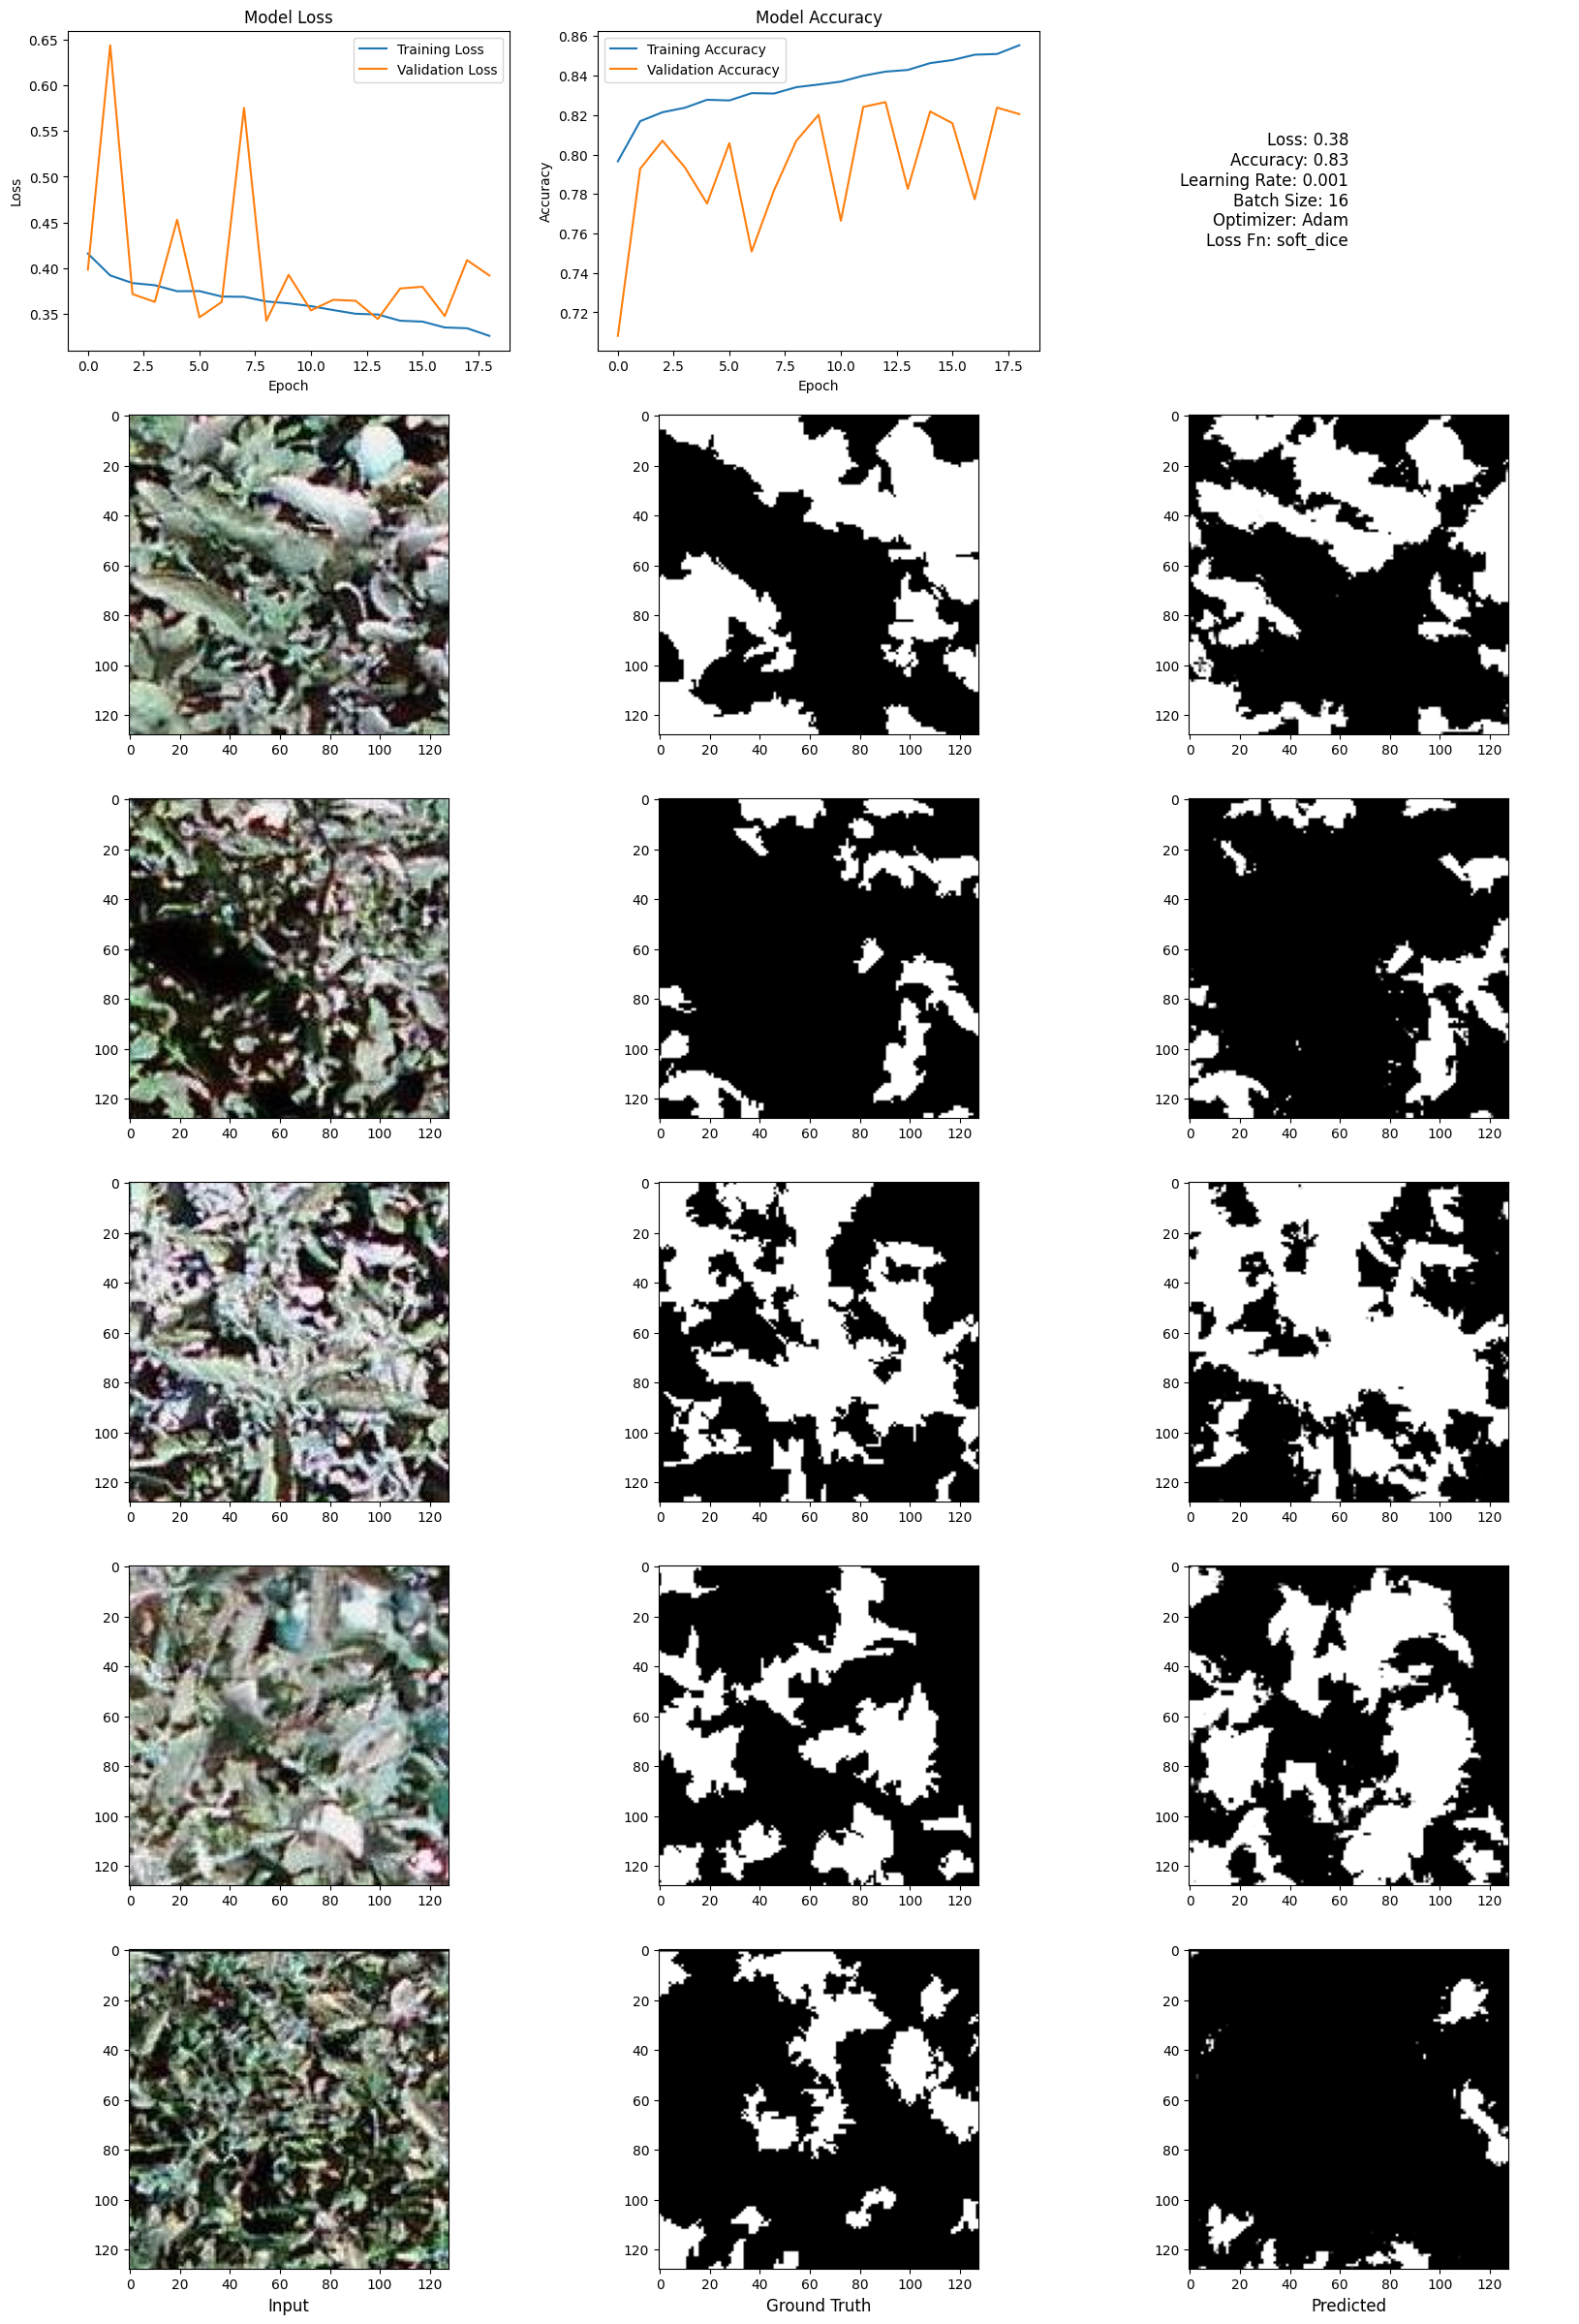

In [4]:
utils.analyzer(history, model, image_path, mask_path, test_images, test_masks, train_attr)